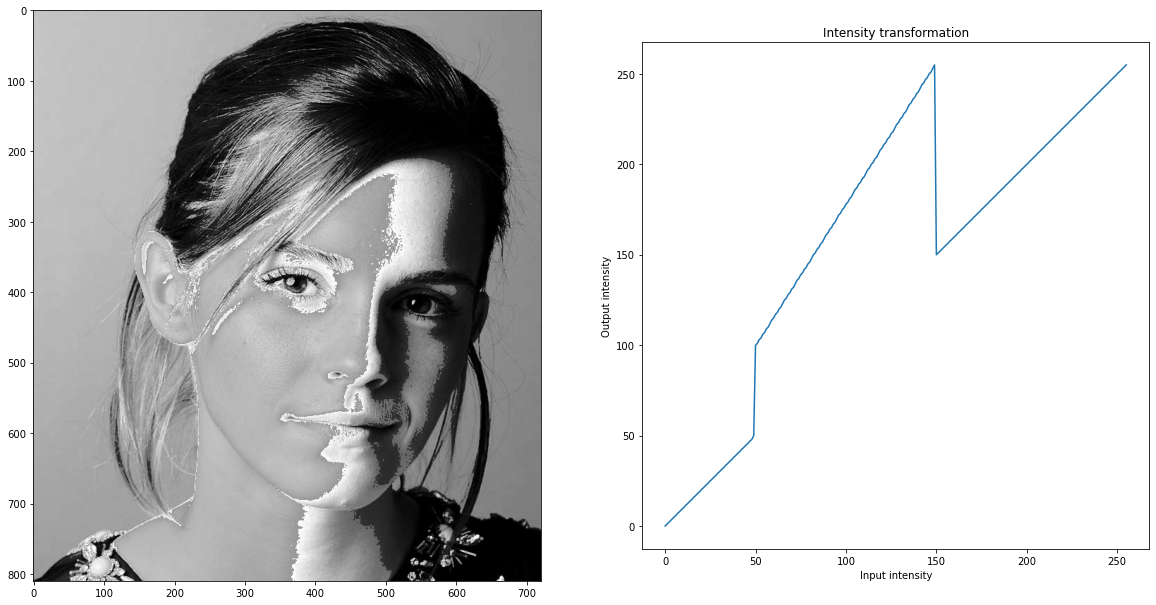

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'emma_gray.jpg') # open image
assert img is not None

# make the transform ranges
range1=np.linspace(0,50,50)
range2=np.linspace(100,255,100)
range3=np.linspace(150,255,106)

# combine all the ranges to a single array
transform=np.concatenate((range1,range2,range3),axis=0).astype(np.uint8)

fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity transformation')
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')
assert len(transform)==256

# perform the intensity transformation on the image
img_new=cv.LUT(img,transform)
ax[0].imshow(cv.cvtColor(img_new,cv.COLOR_BGR2RGB))

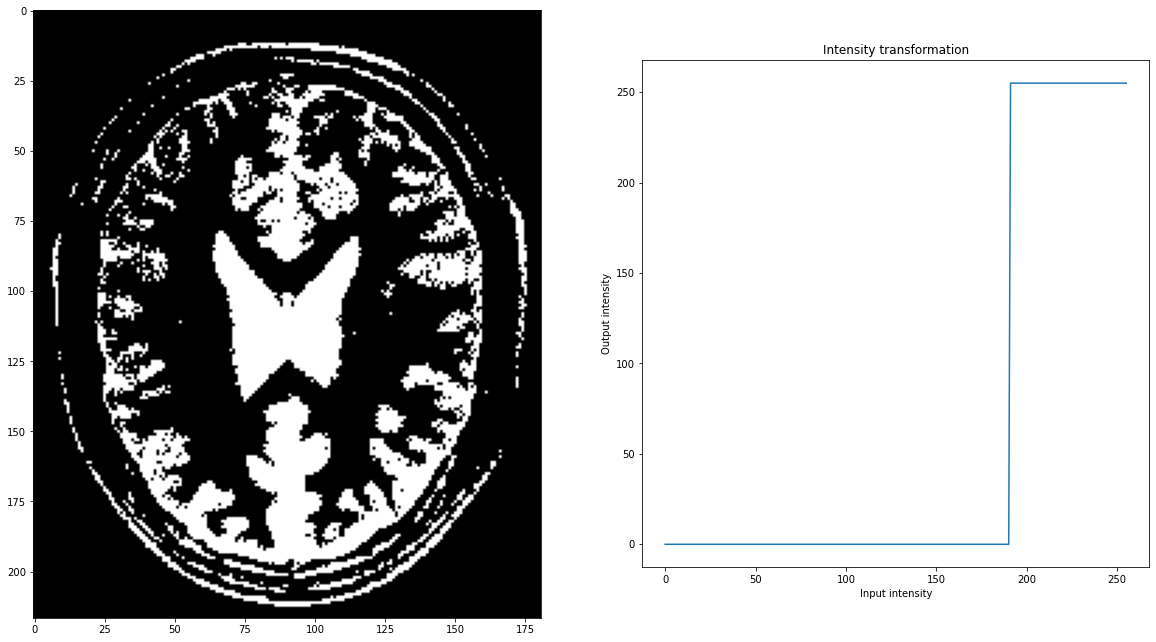

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'brain_proton_density_slice.png') # open image
assert img is not None

# make the transform ranges

range1=np.linspace(0,0,191)
range2=np.linspace(255,255,65)

# combine all the ranges to a single array
transform=np.concatenate((range1,range2),axis=0).astype(np.uint8)
#transform=np.linspace(255,0,256).astype(np.uint8)
fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity transformation')
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')
assert len(transform)==256

# perform the intensity transformation on the image
img_new=cv.LUT(img,transform)
ax[0].imshow(cv.cvtColor(img_new,cv.COLOR_BGR2RGB))

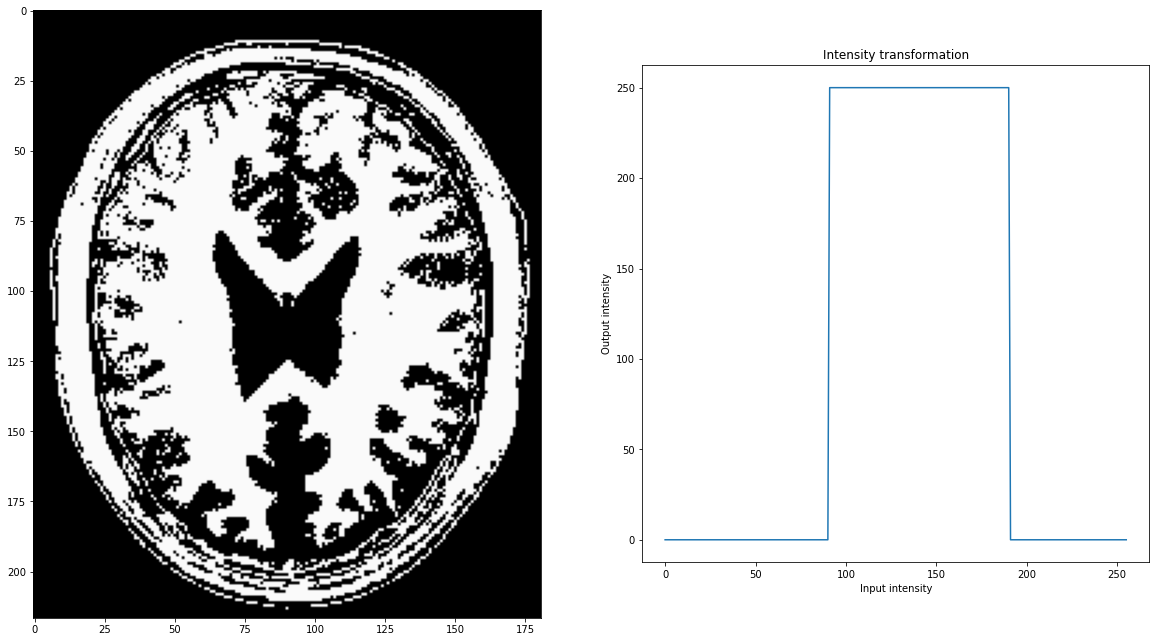

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'brain_proton_density_slice.png') # open image
assert img is not None

# make the transform ranges
range1=np.linspace(0,0,91)
range2=np.linspace(250,250,100)
range3=np.linspace(0,0,65)

# combine all the ranges to a single array
transform=np.concatenate((range1,range2,range3),axis=0).astype(np.uint8)

fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity transformation')
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')
assert len(transform)==256

# perform the intensity transformation on the image
img_new=cv.LUT(img,transform)
ax[0].imshow(cv.cvtColor(img_new,cv.COLOR_BGR2RGB))

In [8]:
'''import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'highlights_and_shadows.jpg') # open image
assert img is not None

lab_img=cv.cvtColor(img,cv.COLOR_BGR2LAB)
gamma=0.6
transform=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
l_img=cv.LUT(lab_img[:,:,0],transform)
new=img.copy()
new[:,:,0]=l_img
new[:,:,1]=lab_img[:,:,1]
new[:,:,2]=lab_img[:,:,2]

fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(cv.cvtColor(lab_img,cv.COLOR_LAB2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(new,cv.COLOR_LAB2RGB))
ax[1].set_title('Corrected Image (Gamma - 0.6)')'''

"import numpy as np\nimport cv2 as cv\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nimg=cv.imread(r'highlights_and_shadows.jpg') # open image\nassert img is not None\n\nlab_img=cv.cvtColor(img,cv.COLOR_BGR2LAB)\ngamma=0.6\ntransform=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)\nl_img=cv.LUT(lab_img[:,:,0],transform)\nnew=img.copy()\nnew[:,:,0]=l_img\nnew[:,:,1]=lab_img[:,:,1]\nnew[:,:,2]=lab_img[:,:,2]\n\nfig,ax=plt.subplots(1,2,figsize=(20,20))\nax[0].imshow(cv.cvtColor(lab_img,cv.COLOR_LAB2RGB))\nax[0].set_title('Original Image')\nax[1].imshow(cv.cvtColor(new,cv.COLOR_LAB2RGB))\nax[1].set_title('Corrected Image (Gamma - 0.6)')"

Text(0.5, 1.0, 'Histogram of Corrected Image (Gamma - 0.4)')

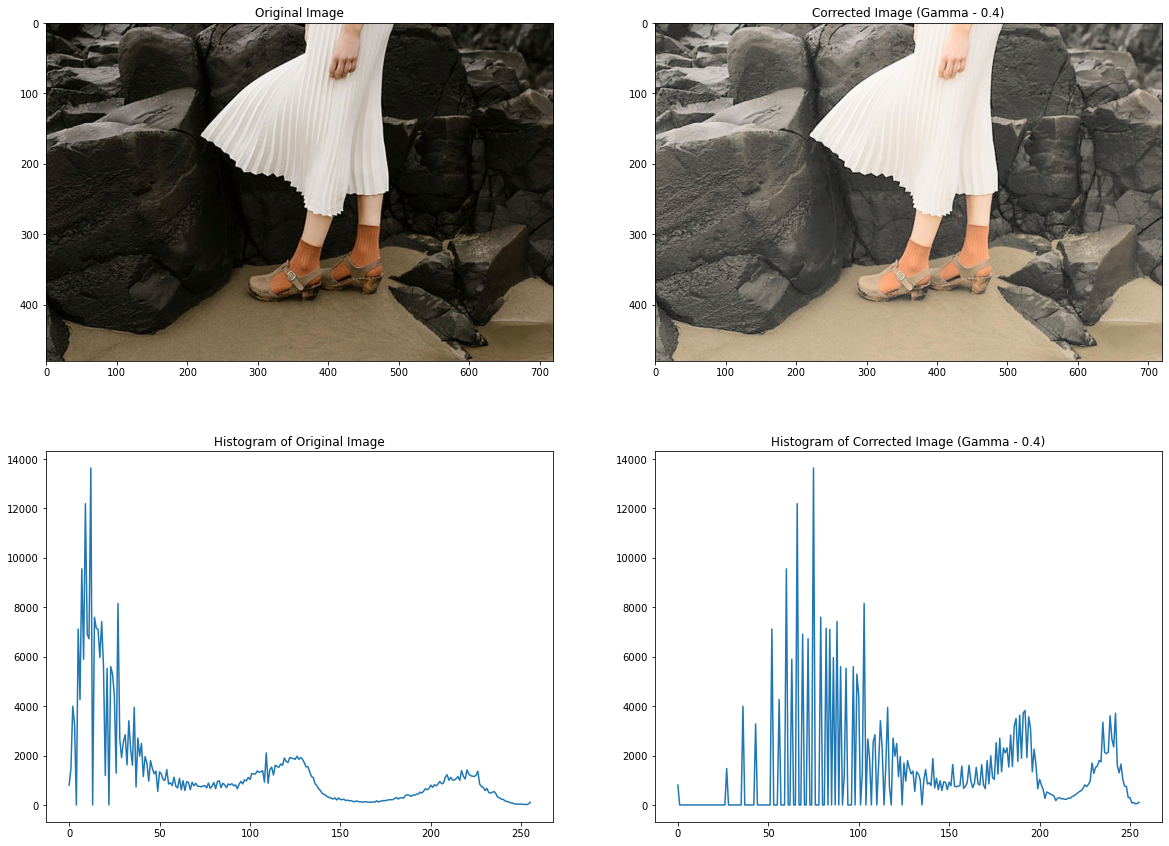

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'highlights_and_shadows.jpg') # open image
assert img is not None

lab_img=cv.cvtColor(img,cv.COLOR_BGR2LAB)
gamma=0.4
transform=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
L,a,b=cv.split(lab_img)
l_img=cv.LUT(L,transform)
new_img=img.copy()
new_img[:,:,0]=l_img
new_img[:,:,1]=lab_img[:,:,1]
new_img[:,:,2]=lab_img[:,:,2]

fig,ax=plt.subplots(2,2,figsize=(20,15))
ax[0][0].imshow(cv.cvtColor(lab_img,cv.COLOR_LAB2RGB))
ax[0][0].set_title('Original Image')
ax[0][1].imshow(cv.cvtColor(new_img,cv.COLOR_LAB2RGB))
ax[0][1].set_title('Corrected Image (Gamma - {})'.format(gamma))

hist_lab_img=cv.calcHist([lab_img],[0],None,[256],[0,256])
hist_new_img=cv.calcHist([new_img],[0],None,[256],[0,256])
ax[1][0].plot(hist_lab_img)
ax[1][0].set_title('Histogram of Original Image')
ax[1][1].plot(hist_new_img)
ax[1][1].set_title('Histogram of Corrected Image (Gamma - {})'.format(gamma))

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


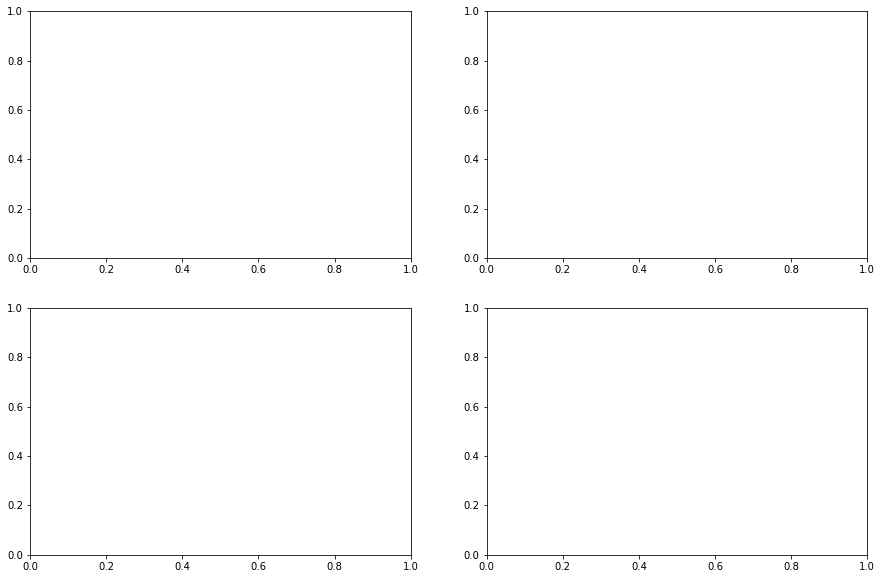

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE) # open image
assert img is not None

intensity_nk=[]
L=256
for k in range(L):
    pk=0
    for row in img:
        pk+=np.count_nonzero(row == k)
    intensity_nk.append([pk])

equalizer_nk=intensity_nk.copy()
MN=len(img)*len(img[0])
cum_prob=0
for i in range(len(equalizer_nk)):
    cum_prob+=equalizer_nk[i][0]/MN

count=0
cum_sum=0
while count<len(equalizer_nk):
    cum_sum+=equalizer_nk[count][0]
    equalizer_nk[count][0]=round(cum_sum*(L-1)/MN)
    count+=1

fig,ax=plt.subplots(2,2,figsize=(15,10))

ax[0][0].imshow(cv.cvtColor(intensity_nk, cv.COLOR_BGR2RGB))
ax[0][0].set_title('Before histogram equalize')
ax[0][1].plot(hist_img)

ax[1][0].imshow(cv.cvtColor(equalizer_nk, cv.COLOR_BGR2RGB))
ax[1][0].set_title('After histogram equalize')
ax[1][1].plot(hist_img_new)